In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\Users\USER_PC_SA\Desktop\anemia.csv")
my_data = df.copy()
my_data.head(10)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
5,0,11.6,22.3,30.9,74.5,1
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
8,0,14.1,29.7,30.5,75.2,0
9,1,14.9,25.8,31.3,82.9,0


In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [12]:
my_data.shape

(1421, 6)

In [14]:
my_data.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

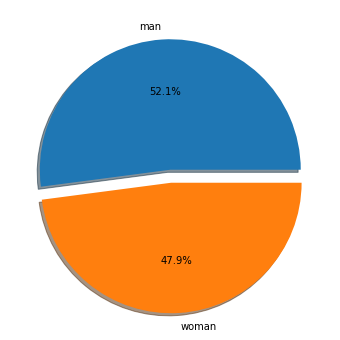

In [25]:
plt.figure(figsize=(10 , 6))
plt.pie(my_data["Gender"].value_counts() , autopct="%1.1f%%" , explode = [0 , 0.1] , shadow=True , labels = ["man" , "woman"])
plt.show()

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


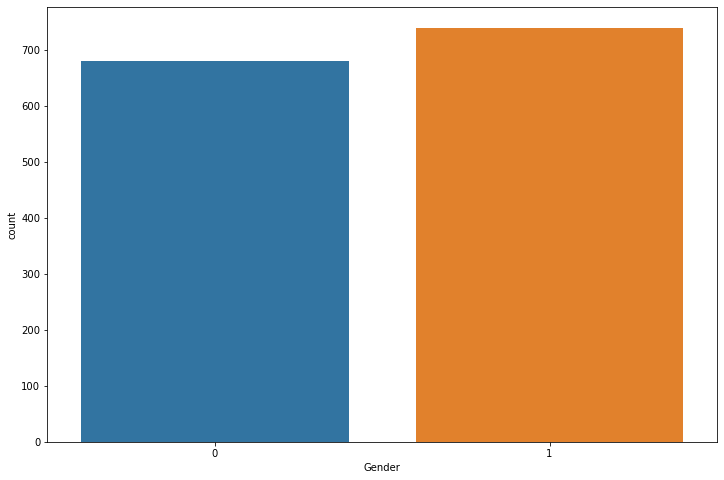

In [28]:
plt.figure(figsize=(12 , 8))
sns.countplot("Gender" , data=my_data)
plt.show()

In [31]:
my_data.groupby(["Gender" , "Result"])["Result"].count()

Gender  Result
0       0         473
        1         208
1       0         328
        1         412
Name: Result, dtype: int64

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Result'>

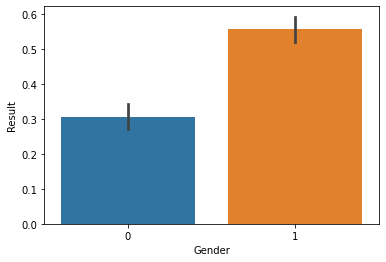

In [68]:
sns.barplot(my_data["Gender"] , my_data["Result"])

C:\Users\USER_PC_SA\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

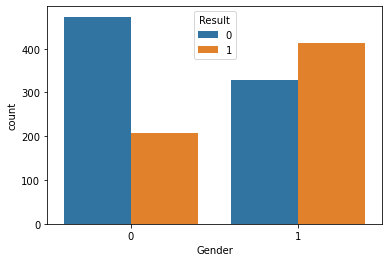

In [71]:
sns.countplot("Gender", hue="Result" , data=my_data)

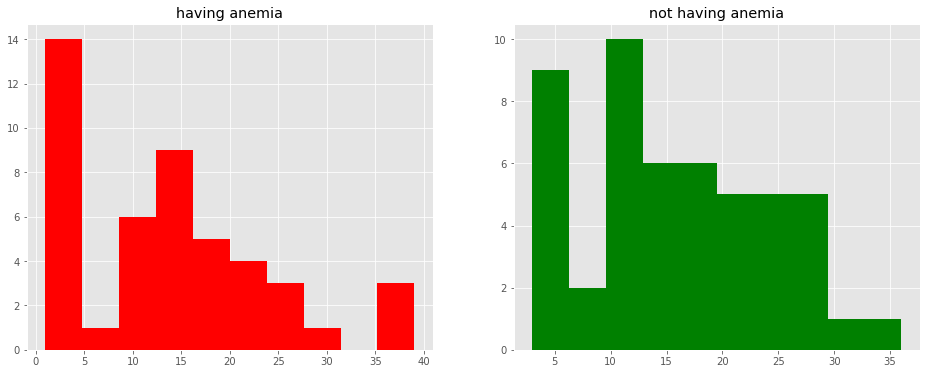

In [98]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.subplot(1 , 2 , 1)
hem1 = my_data["Hemoglobin"][my_data["Result"] == 1].value_counts()
plt.title("having anemia")
plt.hist(hem1 , color="red")

plt.subplot(1 , 2 , 2)
hem0 = my_data["Hemoglobin"][my_data["Result"] == 0].value_counts()
plt.title("not having anemia")
plt.hist(hem0 , color="green")
plt.show()

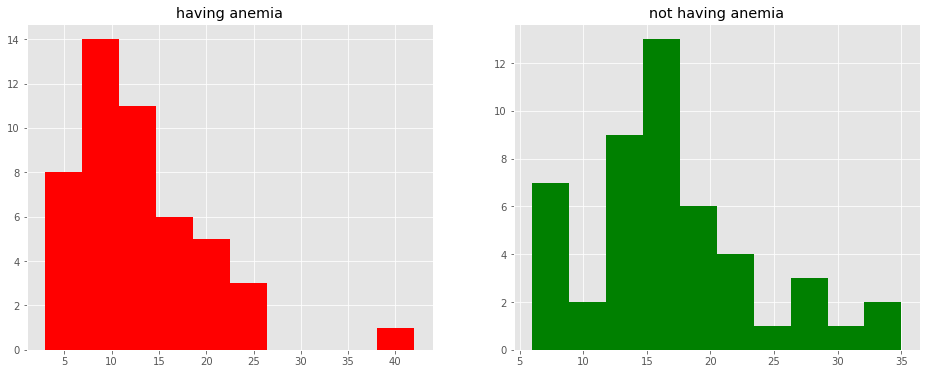

In [97]:
plt.figure(figsize=(16,6))
plt.subplot(1 , 2 , 1)
mc1 = my_data["MCHC"][my_data["Result"] == 1].value_counts()
plt.title("having anemia")
plt.hist(mc1 , color="red")

plt.subplot(1 , 2 , 2)
mc0 = my_data["MCHC"][my_data["Result"] == 0].value_counts()
plt.title("not having anemia")
plt.hist(mc0 , color="green")
plt.show()

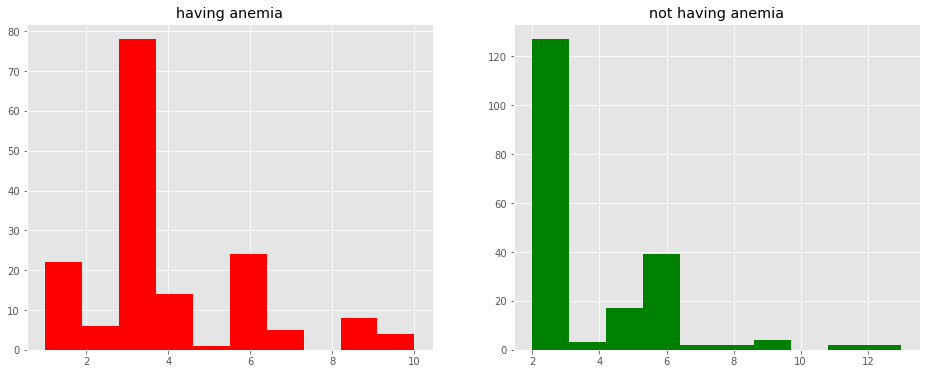

In [100]:
plt.figure(figsize=(16,6))
plt.subplot(1 , 2 , 1)
mcv1 = my_data["MCV"][my_data["Result"] == 1].value_counts()
plt.title("having anemia")
plt.hist(mcv1 , color="red")

plt.subplot(1 , 2 , 2)
mcv0 = my_data["MCV"][my_data["Result"] == 0].value_counts()
plt.title("not having anemia")
plt.hist(mcv0 , color="green")
plt.show()

<AxesSubplot:>

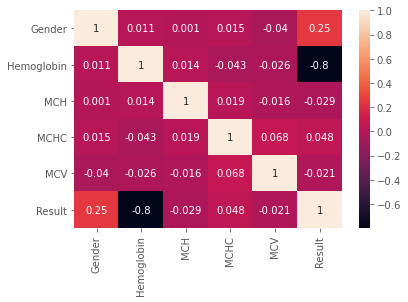

In [102]:
sns.heatmap(my_data.corr() , annot=True)

In [103]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(my_data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Hemoglobin", "MCH", "MCHC", "MCV"])
scaled_df.head()

,Hemoglobin,MCH,MCHC,MCV
0,0.029155,0.025904,0.025491,0.025799
1,0.031112,0.028985,0.024790,0.022193
2,0.017611,0.024535,0.025929,0.021946
3,0.029155,0.018258,0.027506,0.026970
4,0.028764,0.025105,0.024703,0.030669


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [112]:
X = my_data.drop(["Result"] ,axis=1)
Y = my_data["Result"]
Y.shape

(1421,)

In [113]:
x_train , x_test , y_train , y_test = train_test_split(X ,Y ,test_size=0.3 , random_state=11)

## Linear support vector machines(linear-svm)

In [175]:
scv_model = SVC( C=1.0,kernel='linear',degree=3,gamma=0.1,tol=0.001)

In [176]:
scv_model.fit(x_train , y_train)

SVC(gamma=0.1, kernel='linear')

In [177]:
scv_model.score(x_train , y_train)

0.9919517102615694

In [178]:
predl = scv_model.predict(x_test)

In [179]:
accuracy_score(predl , y_test)

0.9882903981264637

In [180]:
con = confusion_matrix(y_test ,predl)
con

array([[218,   5],
       [  0, 204]], dtype=int64)

<AxesSubplot:>

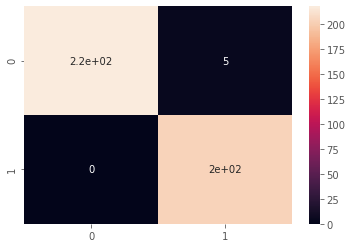

In [181]:
sns.heatmap(con ,annot=True)

## Radial support vector machine (rbf -svm)

In [182]:
scv_model = SVC( C=1.0,kernel='rbf',degree=3,gamma=0.1,tol=0.001)

In [183]:
scv_model.fit(x_train , y_train)

SVC(gamma=0.1)

In [184]:
scv_model.score(x_train , y_train)

0.9828973843058351

In [185]:
predr = scv_model.predict(x_test)

In [186]:
accuracy_score(predr , y_test)

0.9625292740046838

<AxesSubplot:>

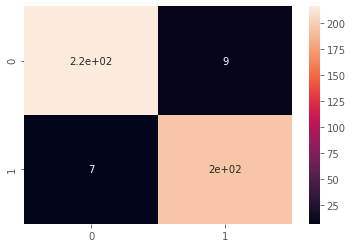

In [189]:
sns.heatmap(confusion_matrix(predr , y_test) , annot=True)

## Logistic Regression

In [190]:
log_model = LogisticRegression()

In [191]:
log_model.fit(x_train , y_train)

LogisticRegression()

In [192]:
log_model.score(x_train , y_train)

0.9909456740442656

In [193]:
predg = log_model.predict(x_test)
accuracy_score(predg , y_test)

0.9859484777517564

<AxesSubplot:>

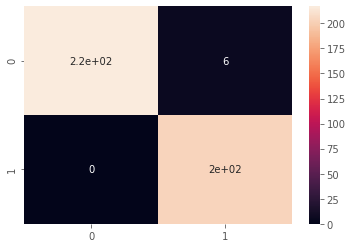

In [195]:
sns.heatmap(confusion_matrix(y_test , predg) , annot=True)

## Decision tree

In [196]:
dt_model = DecisionTreeClassifier()

In [197]:
dt_model.fit(x_train , y_train)

DecisionTreeClassifier()

In [198]:
dt_model.score(x_train , y_train)

1.0

In [199]:
predd = dt_model.predict(x_test)
accuracy_score(predd , y_test)

1.0

<AxesSubplot:>

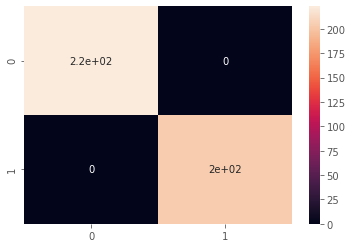

In [200]:
sns.heatmap(confusion_matrix(y_test , predd) , annot=True)

## K_Nearest Neighbours(KNN)

In [201]:
kn_model = KNeighborsClassifier()

In [202]:
kn_model.fit(x_train , y_train)

KNeighborsClassifier()

In [203]:
kn_model.score(x_train , y_train)

0.9436619718309859

In [204]:
predk = kn_model.predict(x_test)
accuracy_score(predk , y_test)

0.8688524590163934

<AxesSubplot:>

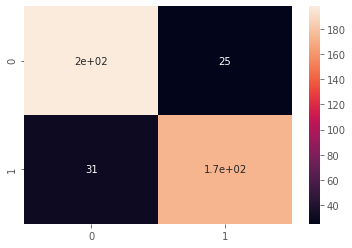

In [205]:
sns.heatmap(confusion_matrix(y_test , predk) , annot=True)

## Gaussian Naive Bayes

In [206]:
gn_model = GaussianNB()

In [207]:
gn_model.fit(x_train , y_train)

GaussianNB()

In [208]:
gn_model.score(x_train , y_train)

0.9325955734406438

In [209]:
predgn = gn_model.predict(x_test)
accuracy_score(predgn , y_test)

0.9437939110070258

<AxesSubplot:>

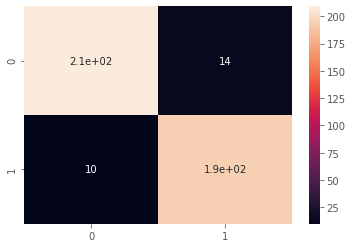

In [210]:
sns.heatmap(confusion_matrix(y_test , predgn) , annot=True)

## Random Forest

In [211]:
rf_model = RandomForestClassifier()

In [212]:
rf_model.fit(x_train , y_train)

RandomForestClassifier()

In [213]:
rf_model.score(x_train , y_train)

1.0

In [214]:
predr = rf_model.predict(x_test)
accuracy_score(predr , y_test)

1.0

<AxesSubplot:>

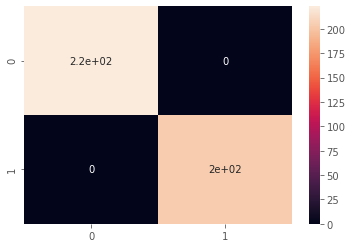

In [215]:
sns.heatmap(confusion_matrix(y_test , predr) , annot=True)

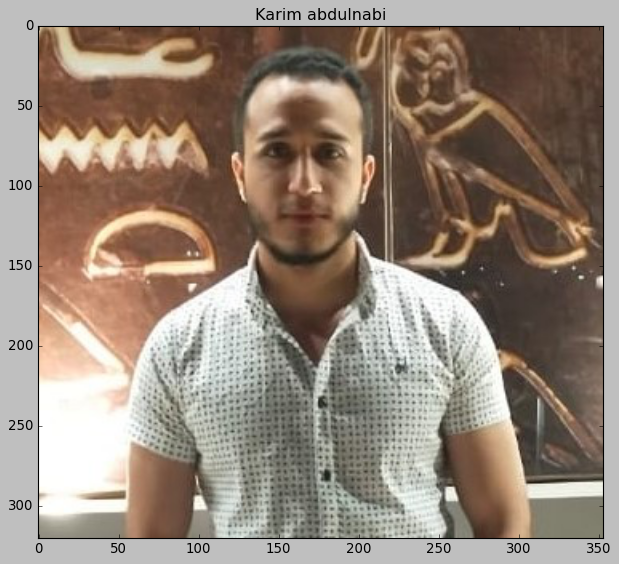

In [219]:
plt.figure(figsize=(16 , 8))
plt.style.use("classic")
image = plt.imread(r"C:\Users\USER_PC_SA\Desktop\karim1.jpeg")
plt.title("Karim abdulnabi")
plt.imshow(image)